# install

In [1]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


# buat eksperimen
yg dilakukan pd tahap ini adalah
* melatih model
* hyperparameter tuning
* tracking training dan hyperparameternya menggunakan mlflow sehingga mlflow akan membuat artifact nya (isinya training, data dan konfigurasi hyperparameter)

In [ ]:
# membuat eksperimen yg dpt ditracking oleh mlflow
import mlflow

# artifact akan disimpan di directory experiment_artifact
# artifact isinya bisa berupa training, hyperparameter, evaluasi, confusion matrix, file hasil training (untuk fine tuning), dll
!mkdir experiment_artifact

# buat eksperimen menggunakan mlflow
mlflow.create_experiment(
    name = "experimen_1",
    artifact_location='experiment_artifact/',
    tags = {"env":"dev", "version":"1.0.0"},
)

'486176321809614432'

ketika dirunning akan generate direktori mlruns/ isinya ada 0 (id dari eksperimen, dibuat scra otomatis oleh mlflow dan start defaultnya 0) dan 486176321809614432 (eksperimen yg dilakukan)

isi dari mlruns/0/meta.yaml adlh

    artifact_location: file:///content/mlruns/0
    creation_time: 1703677323276
    experiment_id: '0'
    last_update_time: 1703677323276
    lifecycle_stage: active
    name: Default

name nya Default karena id dibuat oleh mlflow

isi dari mlruns/48617.../meta.yaml (artifact dari ekperimen yg kita lakukan)

    artifact_location: /content/experiment_artifact
    creation_time: 1703677323286
    experiment_id: '486176321809614432'
    last_update_time: 1703677323286
    lifecycle_stage: active
    name: experimen_1

selain itu ada juga `/content/mlruns/486176321809614432/tags/env` dan `/content/mlruns/486176321809614432/tags/version` yg merupakan isi dari tags ketika kita pertama membuat experiment

untuk melihat eksperimen dlm ui maka gunakan perintah berikut di terminal

    mlflow ui




In [ ]:
!mlflow ui

[2023-12-27 11:49:13 +0000] [4461] [INFO] Starting gunicorn 21.2.0
[2023-12-27 11:49:13 +0000] [4461] [INFO] Listening at: http://127.0.0.1:5000 (4461)
[2023-12-27 11:49:13 +0000] [4461] [INFO] Using worker: sync
[2023-12-27 11:49:13 +0000] [4462] [INFO] Booting worker with pid: 4462
[2023-12-27 11:49:14 +0000] [4463] [INFO] Booting worker with pid: 4463
[2023-12-27 11:49:14 +0000] [4464] [INFO] Booting worker with pid: 4464
[2023-12-27 11:49:14 +0000] [4465] [INFO] Booting worker with pid: 4465

Aborted!
[2023-12-27 11:49:54 +0000] [4461] [INFO] Handling signal: int
[2023-12-27 11:49:54 +0000] [4462] [INFO] Worker exiting (pid: 4462)
[2023-12-27 11:49:54 +0000] [4465] [INFO] Worker exiting (pid: 4465)
[2023-12-27 11:49:54 +0000] [4464] [INFO] Worker exiting (pid: 4464)
[2023-12-27 11:49:54 +0000] [4463] [INFO] Worker exiting (pid: 4463)
[2023-12-27 11:49:55 +0000] [4461] [INFO] Shutting down: Master


agar lbh baik struktur kodenya maka kita buat fungsi eksperimen

In [2]:
import mlflow
from typing import Any

def create_experiment_mlflow(experiment_name: str, artifact_save_location: str, tags: dict[str, Any]) -> str:
  # jika experiment blm pernah dibuat
  try:
    experiment_id = mlflow.create_experiment(
        name = experiment_name, artifact_location = artifact_save_location, tags = tags
    )
  # jika experiment sdh pernah dibuat
  except:
    print(f"Experiment {experiment_name} already exists.")
    # dptkan id dari experiment nya
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

  return experiment_id

In [ ]:
experiment_id = create_experiment_mlflow(
    experiment_name = "experimen_1",
    artifact_save_location ='experiment_artifact/',
    tags = {"env":"dev", "version":"1.0.0"},
)
print(experiment_id)

Experiment experimen_1 already exists.
486176321809614432


In [ ]:
experiment_id = create_experiment_mlflow(
    experiment_name = "experimen_2",
    artifact_save_location ='experiment_artifact/',
    tags = {"env":"dev", "version":"1.0.0"},
)
print(experiment_id)

531631867608238165


# Retrieving Experiments
mendapatkan informasi tentang eksperimen yg tlh dibuat.

In [3]:
import mlflow
# untuk mendptkan informasi tentang eksperimen, mlflow perlu tahu id dari eksperimennya atau nama dari eksperimennya
# sehingga kedua data tsb jd parameter pd fungsi yg kita buat
def get_mlflow_experiment(experiment_id: str = None, experiment_name: str = None) -> mlflow.entities.Experiment:
    # get informasi id eksperimen
    if experiment_id is not None:
        experiment = mlflow.get_experiment(experiment_id)
    # get informasi nama eksperimen
    elif experiment_name is not None:
        experiment = mlflow.get_experiment_by_name(experiment_name)
    # eksperiment tdk ada
    else:
        raise ValueError("Either experiment_id or experiment_name must be provided.")
    return experiment

In [ ]:
# cari menggunakan id
experiment = get_mlflow_experiment(experiment_id="486176321809614432")

print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Creation timestamp: {}".format(experiment.creation_time))

Name: experimen_1
Experiment_id: 486176321809614432
Artifact Location: /content/experiment_artifact
Tags: {'version': '1.0.0', 'env': 'dev'}
Lifecycle_stage: active
Creation timestamp: 1703677323286


In [ ]:
# cari menggunakan nama
experiment = get_mlflow_experiment(experiment_name="experimen_1")

print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Creation timestamp: {}".format(experiment.creation_time))

Name: experimen_1
Experiment_id: 486176321809614432
Artifact Location: /content/experiment_artifact
Tags: {'version': '1.0.0', 'env': 'dev'}
Lifecycle_stage: active
Creation timestamp: 1703677323286


# Deleting experiment
menghapus eksperimen yg tlh dibuat.

In [ ]:
import mlflow

# hapus eksperimen dg id yg kita berikan
mlflow.delete_experiment(experiment_id='531631867608238165')

maka direktori mlruns/531631867608238165 akan dihapus

# MLflow runs

## inisialisasi/memulai (start) mlflor run
untuk mendptkan log maka kita perlu menjlnkan mlflow runs

stlh itu baru kita dpt menyimpan log (misalnya parameter) kedlm eksperimen

selain parameter kita bisa memasukkan description, metrics, tags, artifact kedlm eksperimen

In [ ]:
import mlflow
# inisialisasi mlflow runs
mlflow.start_run()

# informasi log parameter misalnya learning rate dimasukkan kedlm eksperimen
mlflow.log_param("learning_rate", 0.01)

# akhiri mlflow runs nya
mlflow.end_run()

## inisialisasi/memulai (start) mlflor run serta menggunakan with
yg didlm indentasi with akan masuk kedlm log dari mlflow jd kode lbh simple

In [ ]:
import mlflow
with mlflow.start_run(run_name="mlflow_run") as run:
  # log parameter
  mlflow.log_param('learning_rate',0.01)
  print('Run id')
  print(run.info.run_id)
  print('='*10)
  print(run.info)

Run id
c64fddea6ef040fba0502cf74ab0ee02
<RunInfo: artifact_uri='file:///content/mlruns/0/c64fddea6ef040fba0502cf74ab0ee02/artifacts', end_time=None, experiment_id='0', lifecycle_stage='active', run_id='c64fddea6ef040fba0502cf74ab0ee02', run_name='mlflow_run', run_uuid='c64fddea6ef040fba0502cf74ab0ee02', start_time=1703680170426, status='RUNNING', user_id='root'>


## tracking eksperimen


In [ ]:
if __name__=="__main__":

    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name = "testing_mlflow1",
        artifact_save_location ="testing_mlflow1_artifacts",
        tags={"env": "dev", "version": "1.0.0"},
    )

    # cari informasi dari eksperimen yg kita berikan menggunakan name
    mlflow.set_experiment(experiment_name='testing_mlflow1')

    # jlnkan mlflow run
    with mlflow.start_run(run_name="testing") as run:

        # masukkan data learning rate kedlm log parameter
        mlflow.log_param("learning_rate",0.01)
        # run info
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

run_id: 15fecba058bc4a1f8687af719a8bc608
experiment_id: 501789625614987955
status: RUNNING
start_time: 1703680756382
end_time: None
lifecycle_stage: active


sekarang kita lihat menggunakan id dari eksperimen

In [ ]:
if __name__=="__main__":

    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name = "testing_mlflow1",
        artifact_save_location ="testing_mlflow1_artifacts",
        tags={"env": "dev", "version": "1.0.0"},
    )

    # jlnkan mlflow run
    with mlflow.start_run(run_name="testing", experiment_id = experiment.experiment_id) as run:

        # masukkan data learning rate kedlm log parameter
        mlflow.log_param("learning_rate",0.01)
        # run info
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Experiment testing_mlflow1 already exists.
run_id: 06ad669fb81140e3a97e401bde307e83
experiment_id: 501789625614987955
status: RUNNING
start_time: 1703680884753
end_time: None
lifecycle_stage: active


cari berdsrkan id eksperimen yg kita buat

In [ ]:
if __name__=="__main__":

    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name = "testing_mlflow1",
        artifact_save_location ="testing_mlflow1_artifacts",
        tags={"env": "dev", "version": "1.0.0"},
    )

    # dptkan informasi id dari eksperimen
    experiment = get_mlflow_experiment(experiment_id=experiment_id)
    print("Name: {}".format(experiment.name))

    # jlnkan mlflow run
    with mlflow.start_run(run_name="testing", experiment_id = experiment.experiment_id) as run:

        # masukkan data learning rate kedlm log parameter
        mlflow.log_param("learning_rate",0.01)
        # run info
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: testing_mlflow1
run_id: a7516f6584164744845f3f8e4037ee2b
experiment_id: 172815588612644609
status: RUNNING
start_time: 1703691622188
end_time: None
lifecycle_stage: active


## logging parameters
memasukkan hyperparameter selama training kedlm mlflow

In [ ]:
if __name__ == "__main__":

    # dptkan informasi dari eksperimen yg tlh kita buat
    experiment = get_mlflow_experiment(experiment_name="testing_mlflow1")
    print("Name: {}".format(experiment.name))

    # jlnkan mlflow run pd id dari eksperimen yg kita inginkan
    with mlflow.start_run(run_name="logging_params", experiment_id = experiment.experiment_id) as run:

        # hanya 1 log parameter yg dimasukkan kedlm mlflow yaitu hyperparameter learning rate
        mlflow.log_param("learning_rate", 0.01)

        # setting semua hyperparameter
        parameters = {
            "learning_rate": 0.01,
            "epochs": 10,
            "batch_size": 100,
            "loss_function": "mse",
            "optimizer": "adam"
        }

        # masukkan semua hyperparameter kedlm mlflow melalui log param dimana parameternya adlh semua hyperparameter yg tlh kita setting diatas (bntknya dictionary)
        mlflow.log_params(parameters)

        # print run info
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: testing_mlflow1
run_id: 0322780551bc463b9b203d9b9dcc3134
experiment_id: 501789625614987955
status: RUNNING
start_time: 1703681276533
end_time: None
lifecycle_stage: active


## Logging Metrics
metrics disini adlh pengukuran kinerja dari model / evaluasi model sprti matrix : mse, akurasi, recall, dll

In [ ]:
if __name__=="__main__":

    experiment = get_mlflow_experiment(experiment_name="testing_mlflow1")
    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_metrics", experiment_id = experiment.experiment_id) as run:

        # masukkan kedlm mlflow 1 log metrics yaitu random_metrics
        mlflow.log_metric("random_metric", 0.01)

        # setting metrics (dlm bntk dictionary)
        metrics = {
            "mse": 0.01,
            "mae": 0.01,
            "rmse": 0.01,
            "r2": 0.01
        }

        # masukkan kedlm mlflow semua metrics tsb yg sblm tlh kita setting
        mlflow.log_metrics(metrics)

        # print run info
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: testing_mlflow1
run_id: 842fc31bb0b44024a5f043329b61261a
experiment_id: 501789625614987955
status: RUNNING
start_time: 1703681579540
end_time: None
lifecycle_stage: active


## Logging artifacts

### menyimpan file ke artifact dlm mlflow
artifact bisa berupa file hsl training, file yg dihslkan oleh model (hsl prediksi dlm bntk file)

In [ ]:
if __name__=="__main__":
    experiment = get_mlflow_experiment(experiment_name="testing_mlflow1")

    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_artifacts", experiment_id=experiment.experiment_id) as run:

        # buat file bernama hello_world.txt yg isinya adlah string hello world
        with open("hello_world.txt", "w") as f:
            f.write("Hello World!")

        # masukkan file tsb kedlm artifact mlflow dimana local_path adlh path dari file-nya,
        # artifact_path adlh nama path/direktori tempat artifact disimpan didlm mlflow
        mlflow.log_artifact(local_path="hello_world.txt", artifact_path="text_files")

        # print run info
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: testing_mlflow1
run_id: 3e7b63a06f8f427ca0b18c8056b7e293
experiment_id: 172815588612644609
status: RUNNING
start_time: 1703691639921
end_time: None
lifecycle_stage: active


### file yg disimpannya banyak
jika sblmnya file yg tersimpan kedlm log artifact mlflow hanya satu, maka sekarang file nya lbh dr 1

In [ ]:
# file nya
!wget https://raw.githubusercontent.com/manuelgilm/mlflow_for_ml_dev/master/run_artifacts/confusion_matrix.jpeg
with open("hello_world.txt", "w") as f:
  f.write("Hello World!")
!mkdir run_artifacts
!mv /content/confusion_matrix.jpeg run_artifacts/
!mv hello_world.txt run_artifacts/

--2023-12-27 15:50:51--  https://raw.githubusercontent.com/manuelgilm/mlflow_for_ml_dev/master/run_artifacts/confusion_matrix.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17315 (17K) [image/jpeg]
Saving to: ‘confusion_matrix.jpeg’

confusion_matrix.jp 100%[===================>]  16.91K  --.-KB/s    in 0s      

2023-12-27 15:50:51 (75.2 MB/s) - ‘confusion_matrix.jpeg’ saved [17315/17315]



In [ ]:
if __name__=="__main__":

    experiment = get_mlflow_experiment(experiment_name="testing_mlflow1")

    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_artifacts", experiment_id=experiment.experiment_id) as run:

        # masukkan semua file yg ada di folder run_artifacts kedlm log artifact mlflow.
        # semua artifacts akan ada di mlflow directory run_artifacts
        mlflow.log_artifacts(local_dir="./run_artifacts",artifact_path="run_artifacts")

        # print run info
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: testing_mlflow1
run_id: 4d838755e8004aabb6979dfd2937d2ab
experiment_id: 172815588612644609
status: RUNNING
start_time: 1703692386308
end_time: None
lifecycle_stage: active


## Logging images
memasukkan file berupa gambar kedlm mlflow.

pd kasus ini file gambar yg dimasukkan kedlm log mlflow adlah metrics roc, precision-recall dan confusion matrix

Name: testing_mlflow1


run_id: 9beb01aece4d462e929e483a55664ea1
experiment_id: 703447216231522529
status: RUNNING
start_time: 1703725225544
end_time: None
lifecycle_stage: active


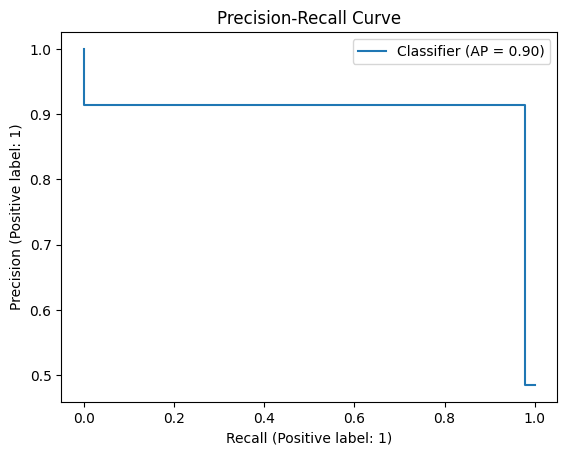

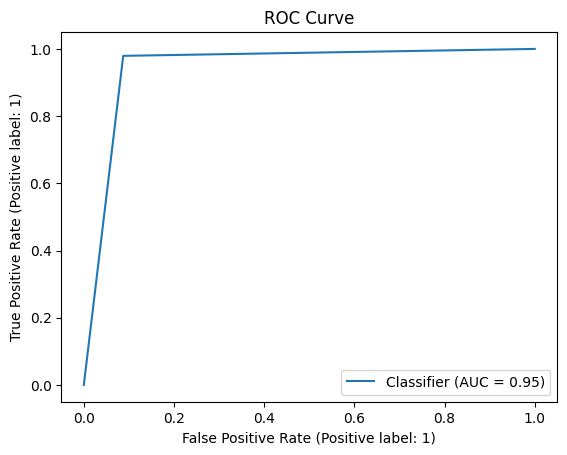

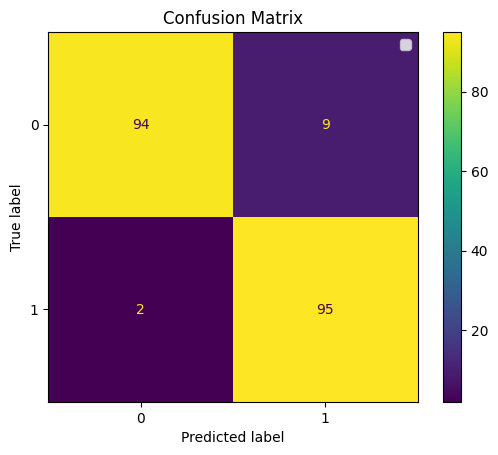

In [4]:
import mlflow

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

if __name__=="__main__":
    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name = "testing_mlflow1",
        artifact_save_location ="testing_mlflow1_artifacts",
        tags={"env": "dev", "version": "1.0.0"},
    )

    # cari id dari eksperimen yg tlh dibuat
    experiment = get_mlflow_experiment(experiment_name="testing_mlflow1")
    print("Name: {}".format(experiment.name))

    # jlnkana mlflow run
    with mlflow.start_run(run_name="logging_images", experiment_id=experiment.experiment_id) as run:

        # buat dummy data
        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
        # split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

        # inisialisasi model serta hyperparameternya
        rfc = RandomForestClassifier(n_estimators=100, random_state=42)
        # fitting dan training model
        rfc.fit(X_train, y_train)
        # prediksi
        y_pred = rfc.predict(X_test)

        # tampilkan kurva precision-recall dlm bntk gambar
        fig_pr = plt.figure()
        pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("Precision-Recall Curve")
        plt.legend()

        # masukkan gambar kurva precision-recall kedlm log gambar dlm mlflow
        mlflow.log_figure(fig_pr, "metrics/precision_recall_curve.png")

        # kurva ROC dlm bntk gambar
        fig_roc = plt.figure()
        roc_display = RocCurveDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("ROC Curve")
        plt.legend()

        # masukkan gambar kurva ROC kedlm log gambar dlm mlflow
        mlflow.log_figure(fig_roc, "metrics/roc_curve.png")

        # gambar confusion matrix dlm bntk gambar
        fig_cm = plt.figure()
        cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("Confusion Matrix")
        plt.legend()

        # masukkan gambar cm kedlm log gambar dlm mlflow
        mlflow.log_figure(fig_cm, "metrics/confusion_matrix.png")

        # print info about the run
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

## logging models
untuk memasukkan data model kedlm mlflow scra otomatis kita gunakan automatic logging dg demikian log dari parameter, metrics dan model akan dimasukkan scra otomatis.

ada 2 cara untuk menggunakan `autologging` tersebut

1. cara 1
  
  * panggil fungsi mlflow.autolog()
  * jlnkan library model sprti keras, pytorch, sklearn, xgboost, spark, lightgbm, fastai, dll

In [5]:
import mlflow

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

if __name__=="__main__":
    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name = "testing_mlflow2",
        artifact_save_location ="testing_mlflow1_artifacts_2",
        tags={"env": "dev", "version": "1.0.0"},
    )

    # get id eksperimen
    experiment = get_mlflow_experiment(experiment_name="testing_mlflow2")
    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_models", experiment_id=experiment.experiment_id) as run:

        # buat dummy data
        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43) # split data

        # jlnkan autologging
        mlflow.autolog()

        rfc = RandomForestClassifier(n_estimators=100, random_state=42) # inisialisasi model serta hyperparameternya
        rfc.fit(X_train, y_train) # fitting dan training
        y_pred = rfc.predict(X_test) # prediksi/inference

        # print info about the run
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: testing_mlflow2


2023/12/28 01:24:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/12/28 01:24:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


run_id: a4573b51ff7d45bf8c33728ce7300d2e
experiment_id: 705775236571440430
status: RUNNING
start_time: 1703726667742
end_time: None
lifecycle_stage: active


dg cara diatas maka log model atau lbh tepatnya dibagian artifacts/model isinya dibuat scra default sdngkan jika ingin customize maka gunakan cara dibawah. perbedaan diatas dan bwh adlh pd kode bwh kita tambahkan log model melalui `mlflow.sklearn.log_model(sk_model=rfc, artifact_path="random_forest_classifier")` , ingat sklearn karena model kita menggunakan sklearn

In [6]:
import mlflow

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

if __name__=="__main__":
    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name = "testing_mlflow3",
        artifact_save_location ="testing_mlflow1_artifacts_3",
        tags={"env": "dev", "version": "1.0.0"},
    )

    # get id eksperimen
    experiment = get_mlflow_experiment(experiment_name="testing_mlflow3")
    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_models", experiment_id=experiment.experiment_id) as run:

        # buat dummy data
        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43) # split data

        # jlnkan autologging
        mlflow.autolog()

        rfc = RandomForestClassifier(n_estimators=100, random_state=42) # inisialisasi model serta hyperparameternya
        rfc.fit(X_train, y_train) # fitting dan training
        y_pred = rfc.predict(X_test) # prediksi/inference


        # log model untuk library sklearn
        mlflow.sklearn.log_model(sk_model=rfc, artifact_path="random_forest_classifier")


        # print info about the run
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

2023/12/28 01:25:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Name: testing_mlflow3
run_id: ddb40e93bebe409ab06f272154176994
experiment_id: 352938691863661121
status: RUNNING
start_time: 1703726742945
end_time: None
lifecycle_stage: active


jd jika ingin memasukkan model kedlm log model mlflow maka gunakan `mlflow.{libarary}.log_model()`

In [8]:
import mlflow

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

if __name__=="__main__":
    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name = "testing_mlflow4",
        artifact_save_location ="testing_mlflow_artifacts_4",
        tags={"env": "dev", "version": "1.0.0"},
    )

    # get id eksperimen
    experiment = get_mlflow_experiment(experiment_name="testing_mlflow4")
    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_models", experiment_id=experiment.experiment_id) as run:

        # buat dummy data
        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43) # split data

        rfc = RandomForestClassifier(n_estimators=100, random_state=42) # inisialisasi model serta hyperparameternya
        rfc.fit(X_train, y_train) # fitting dan training
        y_pred = rfc.predict(X_test) # prediksi/inference


        # log model untuk library sklearn
        mlflow.sklearn.log_model(sk_model=rfc, artifact_path="random_forest_classifier")


        # print info about the run
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: testing_mlflow4
run_id: 0db3ee37a79441c68ee3c544f66feb12
experiment_id: 539674096601219744
status: RUNNING
start_time: 1703727428038
end_time: None
lifecycle_stage: active


2. cara kedua untuk autologging adlh dg memanggil `mlflow.sklearn.autolog()`. kita tambahkan sklearn karena model yg kita latih menggunakan sklearn

In [9]:
import mlflow

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

if __name__=="__main__":
    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name = "testing_mlflow5",
        artifact_save_location ="testing_mlflow1_artifacts_5",
        tags={"env": "dev", "version": "1.0.0"},
    )

    # get id eksperimen
    experiment = get_mlflow_experiment(experiment_name="testing_mlflow5")
    print("Name: {}".format(experiment.name))

    with mlflow.start_run(run_name="logging_models", experiment_id=experiment.experiment_id) as run:

        # buat dummy data
        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43) # split data

        # jlnkan autologging
        mlflow.sklearn.autolog()

        rfc = RandomForestClassifier(n_estimators=100, random_state=42) # inisialisasi model serta hyperparameternya
        rfc.fit(X_train, y_train) # fitting dan training
        y_pred = rfc.predict(X_test) # prediksi/inference

        # print info about the run
        print("run_id: {}".format(run.info.run_id))
        print("experiment_id: {}".format(run.info.experiment_id))
        print("status: {}".format(run.info.status))
        print("start_time: {}".format(run.info.start_time))
        print("end_time: {}".format(run.info.end_time))
        print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

Name: testing_mlflow5
run_id: dcefc2887f064f058d54799204742b5b
experiment_id: 757399246053618448
status: RUNNING
start_time: 1703727830080
end_time: None
lifecycle_stage: active


## Model Inference
dr model yg tlh dibuat dan dimasukkan kedlm mlflow sehingga dpt digunakan lewat framework flavor sekarang kita gunakan model tsb (load) lalu lakukan prediksi/inference

In [11]:
# file nya diload lewat mlflow run
import mlflow

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

if __name__=="__main__":

    run_id = "dcefc2887f064f058d54799204742b5b"

    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
    X = pd.DataFrame(X, columns=["feature_{}".format(i) for i in range(10)])
    y = pd.DataFrame(y, columns=["target"])

    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

    # load model
    # model_uri = f'runs:/{run_id}/{model atau nama_model}'
    model_uri = f'runs:/{run_id}/model'
    rfc = mlflow.sklearn.load_model(model_uri=model_uri)

    # buat prediksi/inference
    y_pred = rfc.predict(X_test)

    # masukkan hsl prediksi kedlm dataframe
    y_pred = pd.DataFrame(y_pred, columns=["prediction"])

    print(y_pred.head())

   prediction
0           0
1           0
2           0
3           1
4           0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [10]:
# file nya diload lewat file
import mlflow

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

if __name__=="__main__":

    run_id = "dcefc2887f064f058d54799204742b5b"

    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
    X = pd.DataFrame(X, columns=["feature_{}".format(i) for i in range(10)])
    y = pd.DataFrame(y, columns=["target"])

    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

    # load model
    model_uri = f"file:///content/testing_mlflow1_artifacts_5/{run_id}/artifacts/model"
    rfc = mlflow.sklearn.load_model(model_uri=model_uri)

    # buat prediksi/inference
    y_pred = rfc.predict(X_test)

    # masukkan hsl prediksi kedlm dataframe
    y_pred = pd.DataFrame(y_pred, columns=["prediction"])

    print(y_pred.head())

   prediction
0           0
1           0
2           0
3           1
4           0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Nested Runs
misal kita perlu running banyak model untuk mengetahui model yg terbaik maka gunakan nested run ini. sehingga setiap model akan memiliki mlflow run nya masing masing.

nantinya akan ada parent run dan child run, kita bisa bayangkan ini sebagai nested if else

In [13]:
import mlflow

# buat eksperimen baru
experiment_id = create_experiment_mlflow(
    experiment_name= "Nested Runs",
    artifact_save_location = "nested_run_artifacts",
    tags={"purpose":"learning"}
)

# parent run
with mlflow.start_run(run_name="parent") as parent:
    print("RUN ID parent:", parent.info.run_id)

    # log parameter untuk parent run
    mlflow.log_param("parent_param", "parent_value")

    # child run level 1 ke 1 (artinya ini bisa menjd parent kedua)
    with mlflow.start_run(run_name="child1",nested=True) as child1:
        print("RUN ID child1:", child1.info.run_id)

        # log parameter untuk child run level 1 ke 1
        mlflow.log_param("child1_param", "child1_value")

        # child run level 2 ke 1
        with mlflow.start_run(run_name="child_11", nested=True) as child_11:
            print("RUN ID child_11:", child_11.info.run_id )
            # log parameter untuk child run level 2 ke 1
            mlflow.log_param("child_11_param", "child_11_value")

        # child run level 2 ke 2
        with mlflow.start_run(run_name="child_12", nested=True) as child_12:
            print("RUN ID child_12:", child_12.info.run_id)
            # log parameter untuk child run level 2 ke 2
            mlflow.log_param("child_12_param", "child_12_value")

    # child run level 1 ke 2
    with mlflow.start_run(run_name="child2", nested=True) as child2:
        print("RUN ID child2:", child2.info.run_id)
        # log parameter untuk child run level 1 ke 2
        mlflow.log_param("child2_param", "child2_value")

RUN ID parent: f99ee61bce1a44998f7642677bf5e205
RUN ID child1: 73e6ed74558c4f76bc88f0108f0598e2
RUN ID child_11: 0c501d99efe943f89217be0248fb6612
RUN ID child_12: de4ad0e33e164ab4b36e9db844979f46
RUN ID child2: 7cee23483be84c39b7dfa00378dd962e


## Log Custom Models
misal kita ingin buat logic model, deploy model, membuat model sendiri tanpa library ml maka gunakan log custom model.

In [15]:
import mlflow

class CustomModel(mlflow.pyfunc.PythonModel):

    def __init__(self):
        pass

    def fit(self):
        print("Fitting model...")

    def predict(self, context, model_input:[str]):
        return self.get_prediction(model_input)

    def get_prediction(self, model_input:[str]):
        # do something with the model input
        return " ".join([w.upper() for w in model_input])


if __name__=="__main__":

    # buat eksperimen
    experiment_id = create_experiment_mlflow(
        experiment_name= "Custom Models",
        artifact_save_location= "custom_model_artifacts",
        tags={"purpose":"learning"}
    )

    # jlnkan mlflow run
    with mlflow.start_run(run_name="custom_model_run") as run:
        custom_model = CustomModel() # instansiasi model

        custom_model.fit() # fitting model

        # log custom model
        mlflow.pyfunc.log_model(
            artifact_path="custom_model",
            python_model=custom_model)

        # log parameter
        mlflow.log_param("param1", "value1")

        # load model
        custom_model = mlflow.pyfunc.load_model(f"runs:/{run.info.run_id}/custom_model")

        prediction = custom_model.predict(["hello", "world"])
        print(prediction)

2023/12/28 03:07:16 INFO mlflow.types.utils: Unsupported type hint: [<class 'str'>], skipping schema inference


Fitting model...
HELLO WORLD


# Model Signature (model schema)
digunakan untuk feature pd dataset.

Model Signature : objek yg mengatur tipe data, shape data

tipe data input dan output hrs ditentukan

In [16]:
import mlflow

from mlflow.models.signature import ModelSignature
from mlflow.models.signature import infer_signature
from mlflow.types.schema import Schema
from mlflow.types.schema import ParamSchema
from mlflow.types.schema import ParamSpec
from mlflow.types.schema import ColSpec
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
from typing import Tuple

# fungsi membuat dummy data
def get_train_data() -> Tuple[pd.DataFrame]:
    x, y = make_classification()
    features = [f"feature_{i+1}" for i in range(x.shape[1])]
    df = pd.DataFrame(x, columns=features)
    df["label"] = y

    return df[features], df["label"]


if __name__ == "__main__":
    x_train, y_train = get_train_data() # buat data
    print(x_train.head())

    # karena Schema memerlukan parameter berupa list yg bertipe colom spec atau tensor spec maka kita hrs buat list yg bertipe data salah satunya
    # dlm kasus ini kita buat colom spec
    cols_spec = []
    # dictionary yg akan convert tipe data dlm pandas dataframe jd tipe data schema mlflow
    data_map = {
        'int64': 'integer',
        'float64': 'double',
        'bool': 'boolean',
        'str': 'string',
        "date": 'datetime'
    }

    print('='*10)
    # convert tipe data dlm pandas dataframe jd tipe data schema mlflow
    for name, dtype in x_train.dtypes.to_dict().items():
      print(name, dtype) # cek tipe data stlh di convert
      # masukkan tipe data yg tlh diconvert kedlm list coloum spec
      cols_spec.append(ColSpec(name=name, type=data_map[str(dtype)]))

    print('='*10)
    print(cols_spec)

    # buat schema untuk data/feature input, tipe datanya dari list dari coloum spec
    input_schema = Schema(inputs=cols_spec)
    # buat schema untuk data/feature output, karena hanya ada 1 feature maka tipe datanya langsung disetting lewat coloum spec
    output_schema = Schema([ColSpec(name="label", type="integer")])

    # parameter model
    parameter = ParamSpec(name="model_name", dtype="string", default="model1")
    # schema untuk semua parameter, ini memerlukan argumen list yg bertipe parameter spec
    param_schema = ParamSchema(params=[parameter])

    print('='*10)
    print(param_schema.to_dict())
    print('='*10)
    print(input_schema)
    print('='*10)
    print(output_schema)
    print('='*10)
    print(param_schema)

    # buat model signature
    model_signature = ModelSignature(inputs=input_schema, outputs=output_schema, params=param_schema)
    print("MODEL SIGNATURE")
    print(model_signature.to_dict())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -1.655428  -0.029774  -0.314526   0.266540  -1.636493   0.704569   
1  -1.719488  -1.488516  -0.658572  -0.588556   0.484831   1.571299   
2   0.860618  -0.802506   1.446735  -0.769953   0.930349  -0.481154   
3   0.325979   0.665760   0.977592   1.219310   0.984762   2.560448   
4   1.656086  -0.521184  -0.464604  -0.568428  -2.045261   1.746882   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0  -1.833129  -0.844436  -0.669049   -0.154382    0.085872   -0.652582   
1   0.535257  -0.098553   0.062183    0.042363    0.985608    1.076487   
2   1.069983  -1.350921   2.511674    0.099768   -0.645089   -1.023508   
3   0.353315   1.104999   0.562895   -0.230238    0.083001    1.489674   
4  -2.943553   0.284729   1.540896   -0.474177    0.895235   -1.353340   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0    0.398696    1.289641    0.301131   -1.019879  

In [17]:
# inference signature, cara ke2 selain model signature. cara ini lbh singkat drpd model signature
model_signature = infer_signature(x_train, y_train, params={"model_name": "model1"})
print("MODEL SIGNATURE")
print(model_signature.to_dict())

MODEL SIGNATURE
{'inputs': '[{"type": "double", "name": "feature_1"}, {"type": "double", "name": "feature_2"}, {"type": "double", "name": "feature_3"}, {"type": "double", "name": "feature_4"}, {"type": "double", "name": "feature_5"}, {"type": "double", "name": "feature_6"}, {"type": "double", "name": "feature_7"}, {"type": "double", "name": "feature_8"}, {"type": "double", "name": "feature_9"}, {"type": "double", "name": "feature_10"}, {"type": "double", "name": "feature_11"}, {"type": "double", "name": "feature_12"}, {"type": "double", "name": "feature_13"}, {"type": "double", "name": "feature_14"}, {"type": "double", "name": "feature_15"}, {"type": "double", "name": "feature_16"}, {"type": "double", "name": "feature_17"}, {"type": "double", "name": "feature_18"}, {"type": "double", "name": "feature_19"}, {"type": "double", "name": "feature_20"}]', 'outputs': '[{"type": "long", "name": "label"}]', 'params': '[{"name": "model_name", "type": "string", "default": "model1", "shape": null}

/usr/local/lib/python3.10/dist-packages/mlflow/models/signature.py:213: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  outputs = _infer_schema(model_output) if model_output is not None else None


In [19]:
# buat eksperimen
experiment_id = create_experiment_mlflow(
    experiment_name="Model Signature",
    artifact_save_location="model_signature_artifacts",
    tags={"purpose": "learning"},
    )

# jlnkan mlflow run
with mlflow.start_run(run_name="model_signature_run") as run:
    mlflow.sklearn.log_model(
        sk_model=RandomForestClassifier(),
        artifact_path="model_signature",
        signature=model_signature,
    )

Experiment Model Signature already exists.


# Serving Multiple Models to a Single Serving Endpoint
ketika deploy banyak model, drpd setiap model menggunakan endpoin yg berbeda beda kita dpt menggunakan 1 endpoin untuk banyak model. hal ini tentunya dg menggunakan flavor

In [20]:
import mlflow

from mlflow.models.signature import infer_signature
from mlflow.models.signature import ModelSignature
from mlflow.types import ColSpec
from mlflow.types import Schema
from mlflow.types import ParamSpec
from mlflow.types import ParamSchema

import numpy as np

# anggap saja class ini untuk handle banyak inference model
class CustomModel(mlflow.pyfunc.PythonModel):
    def predict_model1(self, model_input):
        # proses untuk model 1
        return 0 * model_input

    def predict_model2(self, model_input):
        # proses untuk model 2
        return model_input

    def predict_model3(self, model_input):
        # proses untuk model 3
        return 2 * model_input

    # kita gunakan if else untuk memilh modelnya
    def predict(self, context, model_input, params):
        if params["model_name"] == "model_1":
            return self.predict_model1(model_input=model_input)

        elif params["model_name"] == "model_2":
            return self.predict_model2(model_input=model_input)

        elif params["model_name"] == "model_3":
            return self.predict_model3(model_input=model_input)

        else:
            raise Exception("Model Not Found!")


if __name__ == "__main__":
  # buat model
    experiment_id = create_experiment_mlflow(
        experiment_name="Serving Multiple Models",
        artifact_save_location="serving_multiple_models",
        tags={"purpose": "learning"},
    )

    # buat schema untuk input feature
    input_schema = Schema(inputs=[ColSpec(type="integer", name="input")])
    # buat schema untuk output feature
    output_schema = Schema(inputs=[ColSpec(type="integer", name="output")])
    # buat parameter spec
    param_spec = ParamSpec(name="model_name", dtype="string", default=None)
    # buat schema
    param_schema = ParamSchema(params=[param_spec])
    # buat signature model
    model_signature = ModelSignature(
        inputs=input_schema, outputs=output_schema, params=param_schema
    )

    # jlnkan mlflow run
    with mlflow.start_run(run_name="multiple_models", experiment_id=experiment_id) as run:

        # log model
        mlflow.pyfunc.log_model(artifact_path="model", python_model=CustomModel(), signature=model_signature)

        # load model
        model_uri = f"runs:/{run.info.run_id}/model"
        loaded_model = mlflow.pyfunc.load_model(model_uri=model_uri)

        # buat prediksi
        for n in range(3):
            print(f"PREDICTION FROM MODEL {n+1}")
            print(loaded_model.predict(data={"input":np.int32(10)}, params={"model_name":f"model_{n+1}"}))
            print("\n")

        print(f"RUN_ID: {run.info.run_id}")

PREDICTION FROM MODEL 1
   input
0      0


PREDICTION FROM MODEL 2
   input
0     10


PREDICTION FROM MODEL 3
   input
0     20


RUN_ID: 693d8726b88f49be952322a16fffaca8


kita buat endpoin api nya menggunakan mlflow

In [ ]:
# # format jlnkan api
# !mlflow models serve --model-uri runs:/{RUN ID}/model
# contoh
!mlflow models serve --model-uri runs:/693d8726b88f49be952322a16fffaca8/model

uji model lewat api

untuk mengganti ke model yg kita inginkan dlm memprediksi data maka params pd model_name diganti misal
* model_1 : gunakan model ke 1
* model_2 : gunakan model ke 2

In [ ]:
import json
import requests

data = {
    "dataframe_split": {"columns": ["input"], "data": [15]},
    "params": {"model_name": "model_1"},
}

headers = {"Content-Type": "application/json"}
endpoint = "http://127.0.0.1:5000/invocations"

r = requests.post(endpoint, data=json.dumps(data), headers=headers)
print(r.status_code)
print(r.text)

# Model registry
versi model
* mrpkn centralized model store. didlmnya ada api dan web ui untuk berkolaborasi dg pihak lain agar dpt melakukan managemen lifecycle dr mlflow model
* mrpkn model lineage. mengetahui eksperimen dan run yg dijlnkan
* mrpkn model versioning. versi dr model
* mrpkn stage transition. contohnya dari tahap staging ke production
* mrpkn model annotation. metadata dari model

misal kita melakkukan 2 buah eksperimen dimana setiap eksperimen memiliki banyak mlflow run

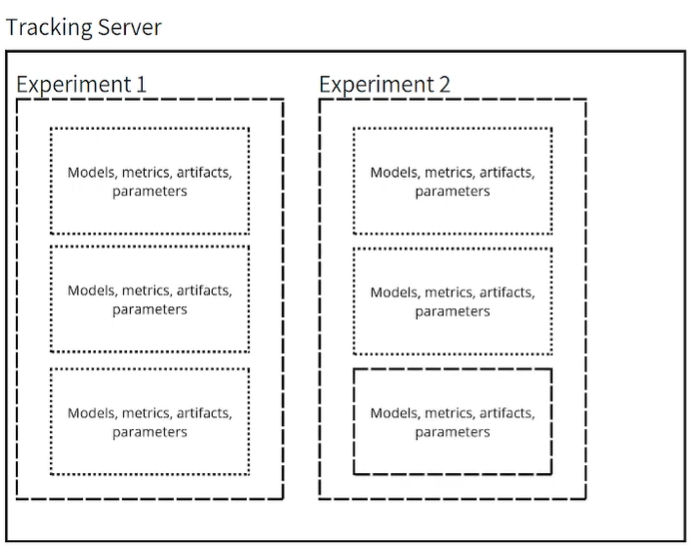

sekarang kita tambahkan model registry sehingga gambarnya menjd sbb

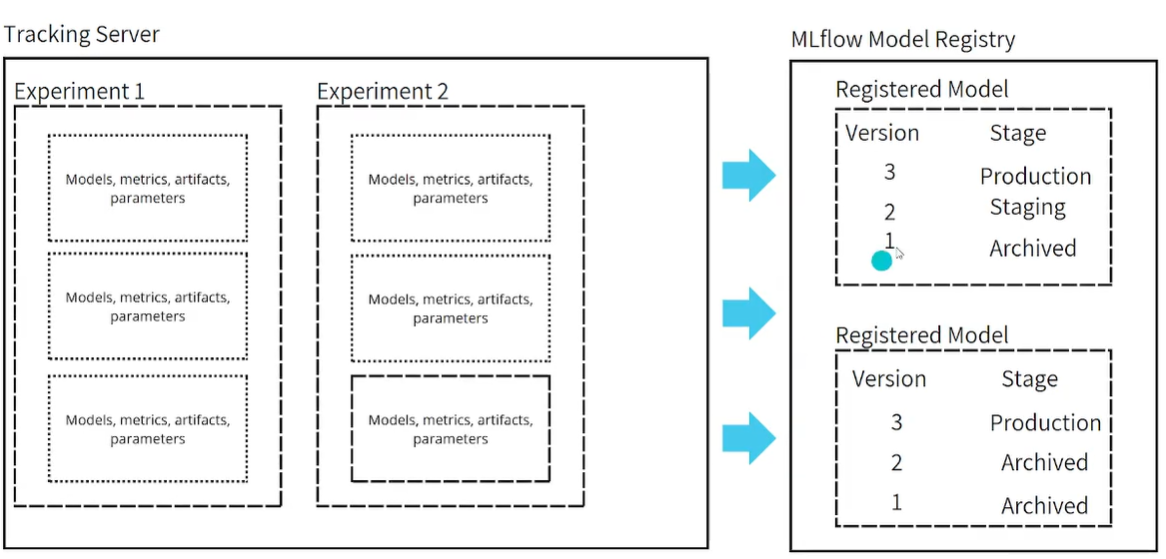

didlm model registry terdpt registered model (artinya model siap digunakan). dan registered model ini terdpt 2 informasi yaitu version (versi dari model) dan jenis stage (fase nya, dimana ada 3 stage yaitu achived, staging, dan production)

yg paling penting kita berubah dari tracking ke model registry

In [3]:
import mlflow
from sklearn.ensemble import RandomForestRegressor

# buat model menggunakan mlflow python model
class CustomModel(mlflow.pyfunc.PythonModel):
    def predict(self, context, model_input):
        return model_input


if __name__ == "__main__":
    experiment_id = mlflow.create_experiment(
        name="model_registry3",
        artifact_location="model_registry_artifacts",
        tags={"purpose": "learning"},
    )

    with mlflow.start_run(run_name="model_registry") as run:
        model = CustomModel()
        # buat 3 model
        mlflow.pyfunc.log_model(artifact_path="custom_model", python_model=model, registered_model_name="CustomModel") # model 1, serta registered model (ada didilm model registry)
        mlflow.sklearn.log_model(artifact_path="rfr_model", sk_model=RandomForestRegressor(), registered_model_name="RandomForestRegressor") # model 2, serta registered model (ada didilm model registry)
        mlflow.sklearn.log_model(artifact_path="rft_model2", sk_model=RandomForestRegressor()) # model 3, tanpa registered model (tdk ada didilm model registry)

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'CustomModel'.
Created version '1' of model 'CustomModel'.
Successfully registered model 'RandomForestRegressor'.
Created version '1' of model 'RandomForestRegressor'.


## model registry operations
operasi yg dpt dilakukan dlm model registry adalah

notice : semuanya dilakukan menggunakan mlflow client api


In [2]:
from mlflow import MlflowClient
import mlflow

experiment_id = mlflow.create_experiment(
    name="model_registry4",
    artifact_location="model_registry_artifacts4",
    tags={"purpose": "learning"},
)
print(experiment_id)

970086714385402685


In [4]:
# client api
client = MlflowClient()
model_name = "registered_model_1" # nama model ini akan menjd nama model registry

### 1 create registered model


In [5]:
client.create_registered_model(name=model_name)

<RegisteredModel: aliases={}, creation_timestamp=1703768097087, description=None, last_updated_timestamp=1703768097087, latest_versions=[], name='registered_model_1', tags={}>

### 2 create model version
ini akan mengisi version dari registered model

In [6]:
# path file artifact
source = "/content/mlruns/0/3474b270ddb843ebad4f721a9518bec2/artifacts/rfr_model"
# id mlflow run
run_id = "3474b270ddb843ebad4f721a9518bec2"
# buat versi model
client.create_model_version(name=model_name, source=source, run_id=run_id)

<ModelVersion: aliases=[], creation_timestamp=1703768118584, current_stage='None', description=None, last_updated_timestamp=1703768118584, name='registered_model_1', run_id='3474b270ddb843ebad4f721a9518bec2', run_link=None, source='/content/mlruns/0/3474b270ddb843ebad4f721a9518bec2/artifacts/rfr_model', status='READY', status_message=None, tags={}, user_id=None, version=1>

### 3 transition model version stage
mengubah status dalam stage

jika stage nya None artinya dalam fase development

jika stage nya staging artinya dlm fase antara development dan production. staging juga bisa bisa berarti dlm fase testing, QA,

In [7]:
client.transition_model_version_stage(name=model_name, version=1, stage="Staging")

<ipython-input-7-6173938f6c1c>:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.2/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name=model_name, version=1, stage="Staging")


<ModelVersion: aliases=[], creation_timestamp=1703768118584, current_stage='Staging', description=None, last_updated_timestamp=1703768125296, name='registered_model_1', run_id='3474b270ddb843ebad4f721a9518bec2', run_link=None, source='/content/mlruns/0/3474b270ddb843ebad4f721a9518bec2/artifacts/rfr_model', status='READY', status_message=None, tags={}, user_id=None, version=1>

kita buat statusnya staging dan version nya 2 tp sblmnya kita buat dulu versi modelnya

In [9]:
# path file artifact
source = "/content/mlruns/0/3474b270ddb843ebad4f721a9518bec2/artifacts/rfr_model"
# id mlflow run
run_id = "3474b270ddb843ebad4f721a9518bec2"
# buat versi model
client.create_model_version(name=model_name, source=source, run_id=run_id)
client.transition_model_version_stage(name=model_name, version=2, stage="Staging")

<ipython-input-9-367a9d5cf936>:7: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.2/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name=model_name, version=2, stage="Staging")


<ModelVersion: aliases=[], creation_timestamp=1703768136391, current_stage='Staging', description=None, last_updated_timestamp=1703768158032, name='registered_model_1', run_id='832a54f39aa54425a651e1181d36f534', run_link=None, source='/content/mlruns/0/832a54f39aa54425a651e1181d36f534/artifacts/rfr_model', status='READY', status_message=None, tags={}, user_id=None, version=2>

kita ubah statusnya dimana untuk version 2 dari staging jd production

In [10]:
client.transition_model_version_stage(name=model_name, version=2, stage="Production")

<ipython-input-10-9d813ae89ba9>:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.2/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name=model_name, version=2, stage="Production")


<ModelVersion: aliases=[], creation_timestamp=1703768136391, current_stage='Production', description=None, last_updated_timestamp=1703768161337, name='registered_model_1', run_id='832a54f39aa54425a651e1181d36f534', run_link=None, source='/content/mlruns/0/832a54f39aa54425a651e1181d36f534/artifacts/rfr_model', status='READY', status_message=None, tags={}, user_id=None, version=2>

kita ubah untuk version 1 dr statusnya staging jd Archived

In [11]:
client.transition_model_version_stage(name=model_name, version=1, stage="Archived")

<ipython-input-11-460d22b07faf>:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.2/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name=model_name, version=1, stage="Archived")


<ModelVersion: aliases=[], creation_timestamp=1703768118584, current_stage='Archived', description=None, last_updated_timestamp=1703768165342, name='registered_model_1', run_id='3474b270ddb843ebad4f721a9518bec2', run_link=None, source='/content/mlruns/0/3474b270ddb843ebad4f721a9518bec2/artifacts/rfr_model', status='READY', status_message=None, tags={}, user_id=None, version=1>

### 4 delete model version
hapus yg nama modelnya model_name serta versionnya 1

In [16]:
client.delete_model_version(name=model_name, version=1)

### 5 delete registered model

In [17]:
client.delete_registered_model(name=model_name)

### 6 menambahkan deskripsi ke registered model
sblmnya ketika membuat registered model kita tdk menambahkan parameter description. kita bisa menambahkan description dg melakukan update

tp sblm melakukan itu, karena kita tlh menghapus registered model maka kita hrs buat dulu registered model yg baru

In [12]:
client.update_registered_model(name=model_name, description="This is a test model")

<RegisteredModel: aliases={}, creation_timestamp=1703768097087, description='This is a test model', last_updated_timestamp=1703768178585, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1703768158017, current_stage='None', description=None, last_updated_timestamp=1703768158017, name='registered_model_1', run_id='3474b270ddb843ebad4f721a9518bec2', run_link=None, source='/content/mlruns/0/3474b270ddb843ebad4f721a9518bec2/artifacts/rfr_model', status='READY', status_message=None, tags={}, user_id=None, version=3>,
 <ModelVersion: aliases=[], creation_timestamp=1703768118584, current_stage='Archived', description=None, last_updated_timestamp=1703768165342, name='registered_model_1', run_id='3474b270ddb843ebad4f721a9518bec2', run_link=None, source='/content/mlruns/0/3474b270ddb843ebad4f721a9518bec2/artifacts/rfr_model', status='READY', status_message=None, tags={}, user_id=None, version=1>,
 <ModelVersion: aliases=[], creation_timestamp=1703768136391, current_stage='Productio

### 7 menambahkan tags ke registered model
kita update registered model dg menambahkan tags. tags disini berupa key: value

In [13]:
client.set_registered_model_tag(name=model_name, key="tag1", value="value1")

### 8 menambahkan deskripsi ke model version
kita update model version untuk yang version nya ke 1 dg menambahkan description

In [14]:
client.update_model_version(name=model_name, version=1, description="This is a test model version")

<ModelVersion: aliases=[], creation_timestamp=1703768118584, current_stage='Archived', description='This is a test model version', last_updated_timestamp=1703768325313, name='registered_model_1', run_id='3474b270ddb843ebad4f721a9518bec2', run_link=None, source='/content/mlruns/0/3474b270ddb843ebad4f721a9518bec2/artifacts/rfr_model', status='READY', status_message=None, tags={}, user_id=None, version=1>

### 9 menambahkan tags ke model version
kita update model version untuk yang version nya ke 1 dg menambahkan tags, tags disini berupa key: value

In [15]:
client.set_model_version_tag(name=model_name, version=1, key="tag1", value="value1")